In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [16]:
# get the shape of train_set in pytorch 
trainset.data.shape  # 50,000 imnages, each with dimension 32*32*3

(50000, 32, 32, 3)

In [17]:
# Diaplay image and respective labels
# on zero index of every row image is presnet, on 1 index is respective label.
trainset[0][0] # will display image
trainset[0][1] # will display label

6

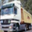

In [20]:
trainset[1][0]

In [21]:
Xtr_rows = trainset.data.reshape(trainset.data.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = testset.data.reshape(testset.data.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072

In [24]:
num_test = Xte_rows.shape[0]
Ypred = np.zeros(num_test)
Ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0] # 10,000 test examples
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test) #, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test): # num_test has 10,000 test examples
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example
      print(i, distances, len(distances), min_index, Ypred[i])
    return Ypred

In [32]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(Xtr_rows, trainset.targets) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xte_rows) # predict labels on the test images

In [28]:
print ('accuracy: ',  np.mean(Yte_predict == testset.targets) )

accuracy:  0.2492
